# Simple Linear Regression

## Let us import Pandas and Numpy

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Let's create my own Simple Linear Regressor

In [423]:
class SimpleLinearRegressor:
    
    ''' Defines Simple Linear Regressor which finds best fit line for the given data. '''
    
    def __init__(self, X, y):
        '''
        Parameters :
        ------------
        
        X --> Independent Variable, type : pandas.core.series.Series
        y --> Dependent Variable  , type : pandas.core.series.Series  
        '''
        self.X = X
        self.y = y
    
    def fit(self):
        
        self._X_mean = self.X.mean()
        self._y_mean = self.y.mean()
        
        _X_mean_diff = self.X - self._X_mean
        _y_mean_diff = self.y - self._y_mean
        
        self.slope = (_X_mean_diff * _y_mean_diff).sum() / (_X_mean_diff ** 2).sum()
        
        self.intercept = self._y_mean - (self.slope * self._X_mean)
        
        s = "Slope is {0} and y-Intercept is {1}"
        return s.format(self.slope, self.intercept)
    
    def plot_regressor(self):
        plt.figure(figsize=(10, 7))
        plt.scatter(self.X, self.y)
        plt.scatter(self._X_mean, self._y_mean, marker = '^', s=100, color = 'm')
        _y_pred = self.X * self.slope + self.intercept
        plt.plot(self.X, _y_pred, 'g')
        plt.show()
        return
    
    def mse(self):
        ''' Returns Mean Squared Error '''
        _y_pred = self.X * self.slope + self.intercept
        return ((self.y - _y_pred)**2).sum() / len(self.y)
    
    def rmse(self):
        return self.mse()**0.5
    
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
        _y_pred = self.X * self.slope + self.intercept
        line_1_sum = ((self.y - _y_pred) ** 2).sum()
        line_2_sum = ((self.y - self._y_mean) ** 2).sum()
        # print(line_1_sum, line_2_sum)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

# Own Dataset

### Using above created my own class

In [385]:
df = pd.DataFrame({'X' : [1,2,3,4,5], 'y' : [3,4,2,4,5]})
df

,X,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [386]:
own_regressor = SimpleLinearRegressor(df['X'], df['y'])

In [387]:
own_regressor.fit()

'Slope is 0.4 and y-Intercept is 2.4'

In [388]:
own_regressor.intercept

2.4

In [389]:
own_regressor.slope

0.4

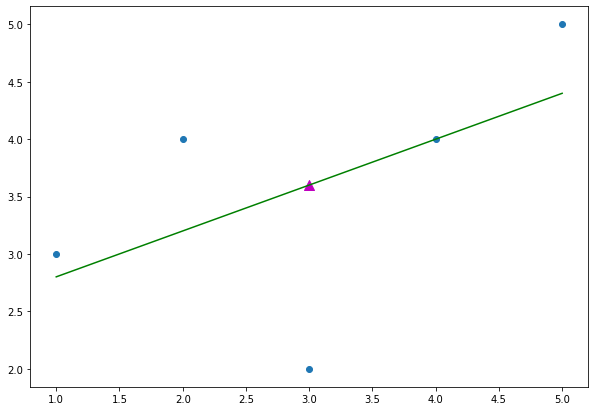

In [390]:
own_regressor.plot_regressor()

In [391]:
own_regressor.mse()

0.72

In [392]:
own_regressor.rmse()

0.848528137423857

In [393]:
own_regressor.r2_score()

R2 Score = 0.30769230769230776


0.30769230769230776

### Using sklearn

In [394]:
from sklearn.linear_model import LinearRegression

In [395]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

In [396]:
skl_regressor = LinearRegression()

In [397]:
skl_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [398]:
skl_regressor.coef_

array([0.4])

In [399]:
skl_regressor.intercept_

2.4000000000000004

In [400]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, skl_regressor.predict(X))

0.7200000000000002

In [401]:
r2_score(y, skl_regressor.predict(X))

0.3076923076923075

<br><br><br><br><br><br><br>

# Salary Dataset

### Using above created my own class

In [402]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [403]:
salary.shape

(30, 2)

In [404]:
own_salary_regressor = SimpleLinearRegressor(sal['YearsExperience'], sal['Salary'])

In [405]:
own_salary_regressor.fit()

'Slope is 9449.962321455077 and y-Intercept is 25792.20019866869'

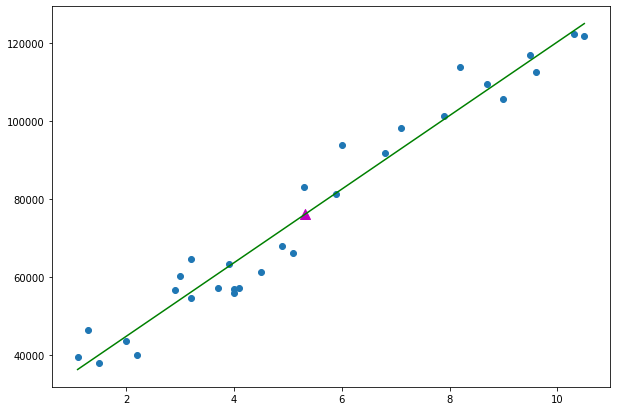

In [406]:
own_salary_regressor.plot_regressor()

In [407]:
own_salary_regressor.mse()

31270951.72228097

In [408]:
own_salary_regressor.rmse()

5592.043608760662

In [409]:
own_salary_regressor.r2_score()

R2 Score = 0.9569566641435084


0.9569566641435084

### Using sklearn

In [410]:
from sklearn.linear_model import LinearRegression

In [411]:
X = salary.iloc[:, [0]].values
y = salary.iloc[:, 1].values

skl_salary_regressor = LinearRegression()
skl_salary_regressor.fit(X, y)

skl_salary_regressor.coef_, skl_salary_regressor.intercept_

(array([9449.96232146]), 25792.200198668717)

In [412]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, skl_salary_regressor.predict(X))

31270951.722280957

In [413]:
r2_score(y, skl_salary_regressor.predict(X))

0.9569566641435086

<br><br><br><br><br><br><br>

# Height - Weight dataset

In [414]:
hw = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
hw = hw[hw['Gender'] == 'Male']
hw.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5


### Using above created my own class

In [415]:
own_weight_regressor = SimpleLinearRegressor(hw['Height'], hw['Weight'])
own_weight_regressor.fit()

'Slope is -0.04874589205006 and y-Intercept is 114.58397655987223'

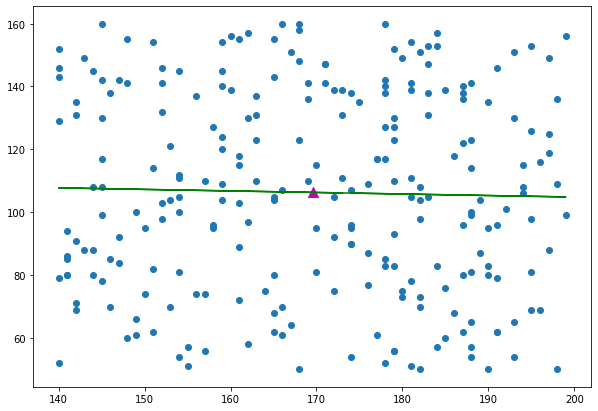

In [416]:
own_weight_regressor.plot_regressor()

In [417]:
own_weight_regressor.mse()

1008.4977372354219

In [418]:
own_weight_regressor.rmse()

31.756853390023103

In [419]:
own_weight_regressor.r2_score()

R2 Score = 0.0006829275267121801


0.0006829275267121801

### Using sklearn

In [420]:
X = hw.iloc[:, [1]].values
y = hw.iloc[:, 2].values

from sklearn.linear_model import LinearRegression
skl_weight_regressor = LinearRegression()
skl_weight_regressor.fit(X, y)
skl_weight_regressor.coef_, skl_weight_regressor.intercept_

(array([-0.04874589]), 114.58397655987221)

In [421]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, skl_weight_regressor.predict(X))

1008.4977372354218

In [422]:
r2_score(y, skl_weight_regressor.predict(X))

0.0006829275267122847